# A practical Guide to Feature Engineering in Python

Feature engineering is one of the most important skills needed in data science and machine learning. It has a major influence on the performance of machine learning models and even the quality of insights derived during exploratory data analysis (EDA).

In this article, we’re going to learn some important techniques and tools that will help you properly extract, prepare, and engineer features from your dataset.

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

Data from Kaggle:

https://www.kaggle.com/antfarol/car-sale-advertisements

https://www.kaggle.com/satadru5/car-sale-prediction

# 1. Importing the relevant libraries

In [218]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# 2. Common function

In [237]:
def Predictive_Model(num_df, cat_df, target):
    
    
    # merge num_df and dummy cat_df
    if(cat_df.shape[0] > 0):
        input_df = pd.concat([num_df,cat_df],axis=1)
    else:
        input_df = num_df.copy()
    
    # scaling features for numerical vars
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(num_df)
    #input_df = scaler.transform(num_df)
    #input_df = pd.DataFrame(input_df, columns = num_df.columns)
        
    # train test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(input_df, df[target], test_size=0.2, random_state=365)
    
    # build model
    import statsmodels.api as sm
    X = sm.add_constant(X_train)
    results = sm.OLS(y_train, X).fit()
    
    # return result
    print(results.summary())
    
    # print Rsquare of train set and test sest
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    print('Train set score: ', reg.score(X_train, y_train))
    print('Test set score: ', reg.score(X_test, y_test))

In [220]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(141)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(142)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(143)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
       
    ## scatter plot
    plt.subplot(144)
    plt.scatter(df[var],df[target])
    plt.title('scatter plot')
    
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

# 3. Loading the raw data

In [303]:
df = pd.read_csv('CarSale.csv')
org_df = df.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# 4. Data Preparation

### 4.1. Dealing with missing value: Removing rows with missing values

In [304]:
print('Original shape: ', df.shape)
df = df.dropna(axis=0)
print('After removing data: ', df.shape)

df = df.reset_index(drop=True)
cleaned_df = df.copy()

Original shape:  (4345, 9)
After removing data:  (4025, 9)


In [305]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# 5. Experiments

## 5.1. Numerical vars

In [306]:
target = 'Price'
num_vars = [var for var in df.columns if df[var].dtypes != 'O' and var != target]
num_df = df[num_vars]
cat_df = pd.DataFrame()

### 5.1.1. Data Overview

In [307]:
num_df.head()

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011


### 5.1.2. Exploring distribution

Notice the minimum and maximum values with respect to the 

#### Distribution of target var

Skewness: 4.444409
Kurtosis: 28.929701


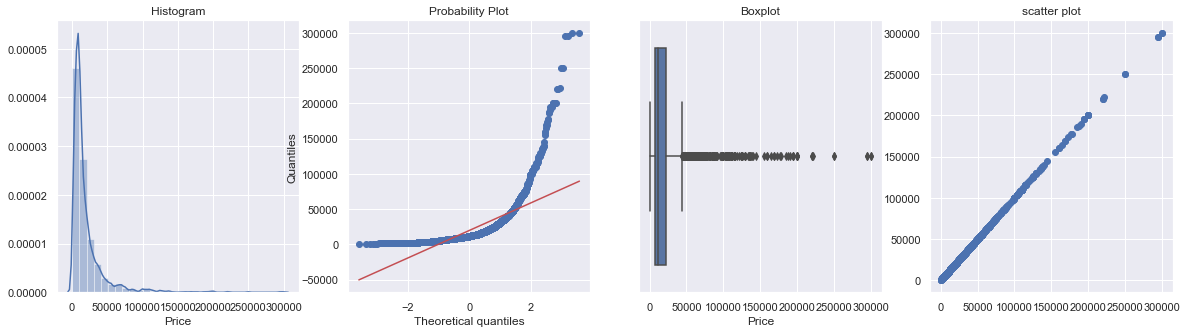

In [308]:
analyse_continuous(df,'Price',target)

#### Distribution of Independent Variable

Skewness: 0.700196
Kurtosis: 1.809798


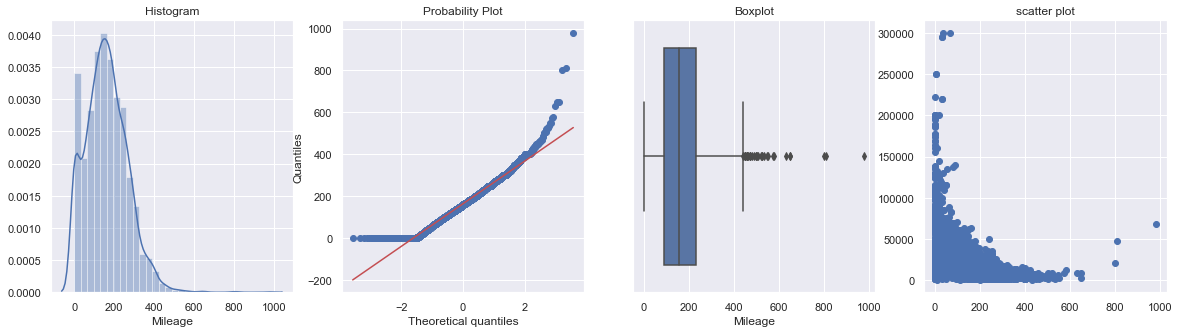

Skewness: 17.154962
Kurtosis: 316.181652


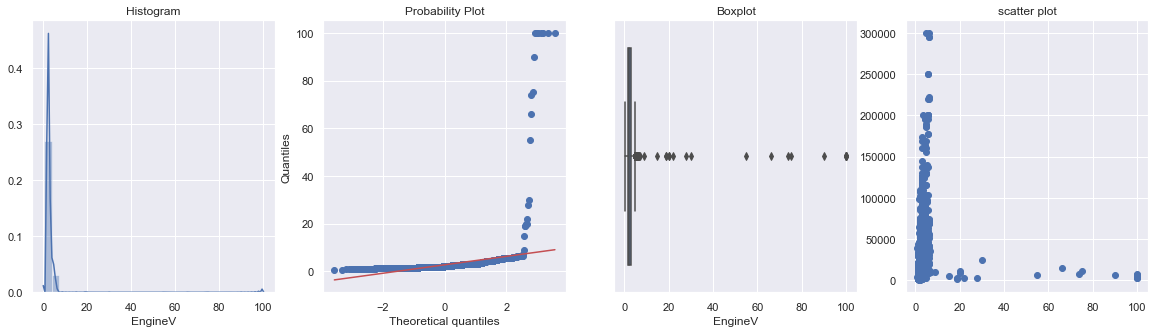

Skewness: -0.963945
Kurtosis: 0.999387


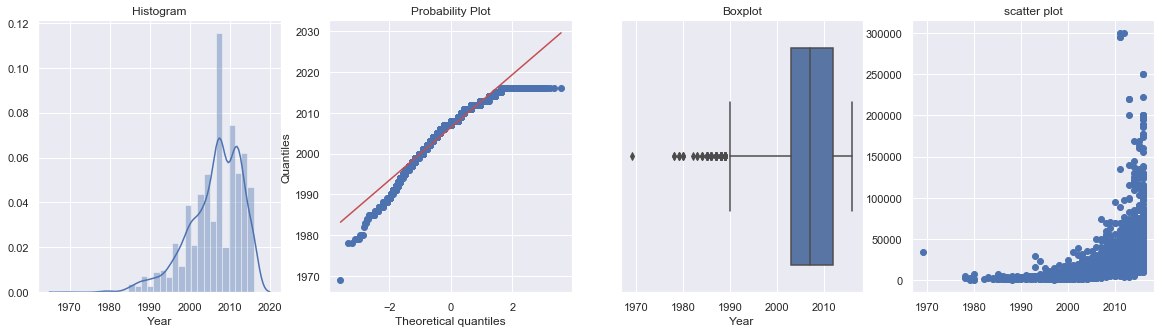

In [309]:
for var in num_vars:
    analyse_continuous(df,var,target)

### 5.1.1. Numvars without preprocessing

#### Exp 1:  Use only numerical vars

In [310]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     409.0
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          4.92e-225
Time:                        06:50:42   Log-Likelihood:                -36910.
No. Observations:                3220   AIC:                         7.383e+04
Df Residuals:                    3216   BIC:                         7.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.395e+06   1.67e+05    -14.302      0.0

### 5.1.2. Treating outliers

In [311]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [312]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [313]:
df.shape

(4025, 9)

#### Exp 2:  numerical vars + Handling outliers

In [314]:
df = cleaned_df.copy()

Year

Skewness: -0.963945
Kurtosis: 0.999387


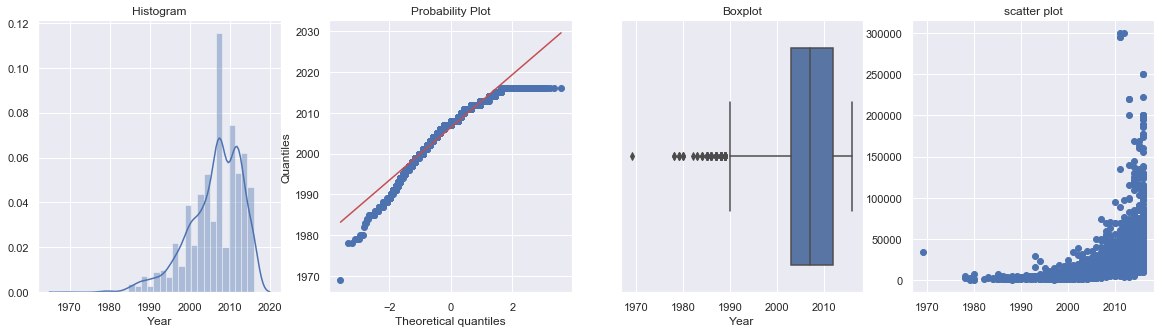

In [315]:
analyse_continuous(df,'Year',target)

In [316]:
# calculate boundaries for Year
upper_boundary, lower_boundary = find_normal_boundaries(df, 'Year')
upper_boundary, lower_boundary

(2026.46641322036, 1986.292841438025)

In [317]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Year (right end outliers): {}'.format(
    len(df[df['Year'] > upper_boundary])))

print('cars with less than lower_boundary of Year (left end outliers: {}'.format(
    len(df[df['Year'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Year'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Year'] < lower_boundary]) / len(df)))

total number of Year: 4025
cars with more than upper_boundary of Year (right end outliers): 0
cars with less than lower_boundary of Year (left end outliers: 38

% right end outliers: 0.0
% left end outliers: 0.009440993788819876


In [318]:
df = df[(df.Year < upper_boundary) & (df.Year > lower_boundary)]
df = df.reset_index(drop=True)
df.shape

(3987, 9)

Skewness: -0.762869
Kurtosis: 0.201604


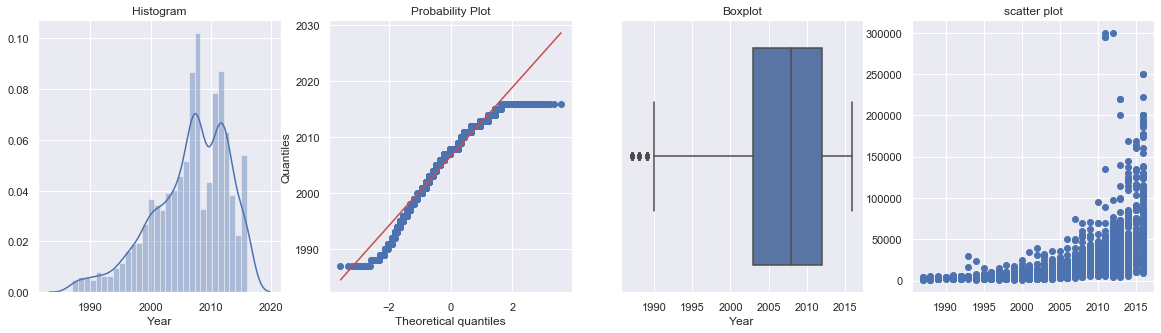

In [319]:
analyse_continuous(df,'Year',target)

Mileage

Skewness: 0.706495
Kurtosis: 1.868399


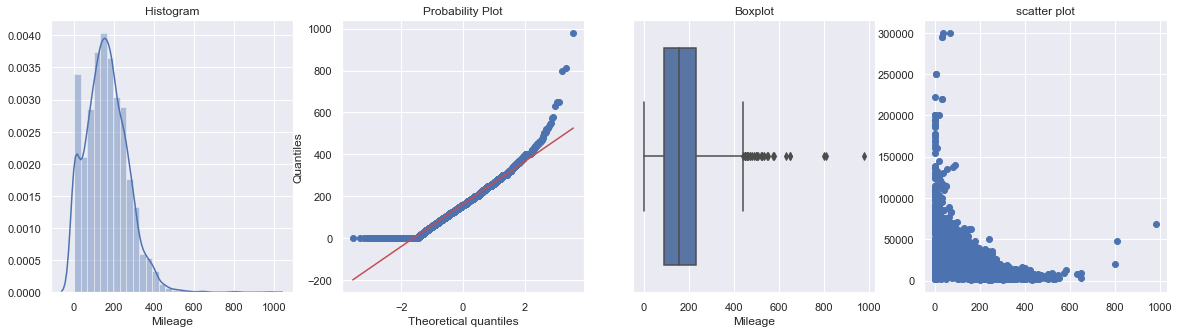

In [320]:
analyse_continuous(df,'Mileage',target)

In [321]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'Mileage', 2)
upper_boundary, lower_boundary

(510.0, -190.0)

In [322]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['Mileage'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['Mileage'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Mileage'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Mileage'] < lower_boundary]) / len(df)))

total number of Year: 3987
cars with more than upper_boundary of Mileage (right end outliers): 14
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.003511412089290193
% left end outliers: 0.0


In [323]:
df = df[(df.Mileage < upper_boundary) & (df.Mileage > lower_boundary)]
df = df.reset_index(drop = True)
df.shape

(3973, 9)

Skewness: 0.368103
Kurtosis: -0.178503


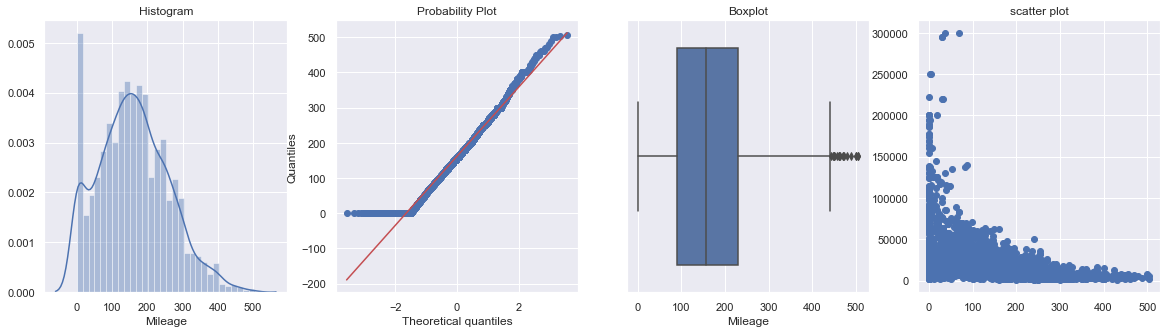

In [324]:
analyse_continuous(df,'Mileage',target)

EngineV

Skewness: 17.049629
Kurtosis: 312.213441


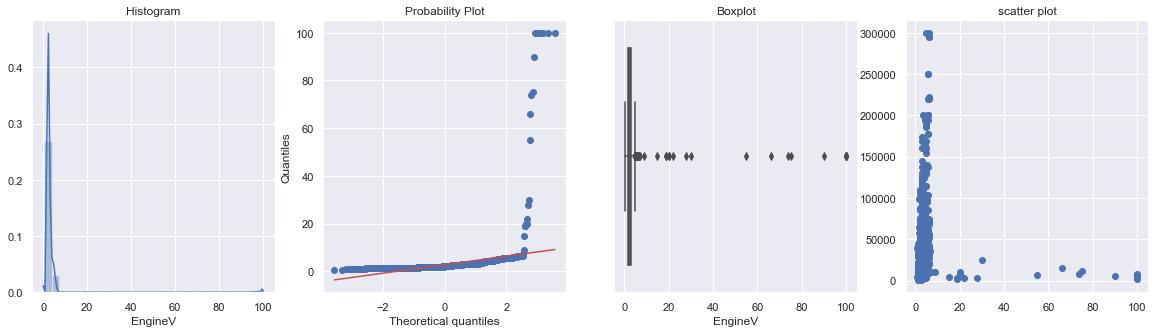

In [325]:
analyse_continuous(df,'EngineV',target)

In [326]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'EngineV', 5)
upper_boundary, lower_boundary

(9.0, -4.2)

In [327]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['EngineV'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['EngineV'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['EngineV'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['EngineV'] < lower_boundary]) / len(df)))

total number of Year: 3973
cars with more than upper_boundary of Mileage (right end outliers): 20
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.005033979360684621
% left end outliers: 0.0


In [328]:
df = df[(df.EngineV < upper_boundary) & (df.EngineV > lower_boundary)]
df = df.reset_index()
df.shape

(3952, 10)

Skewness: 1.492797
Kurtosis: 2.256621


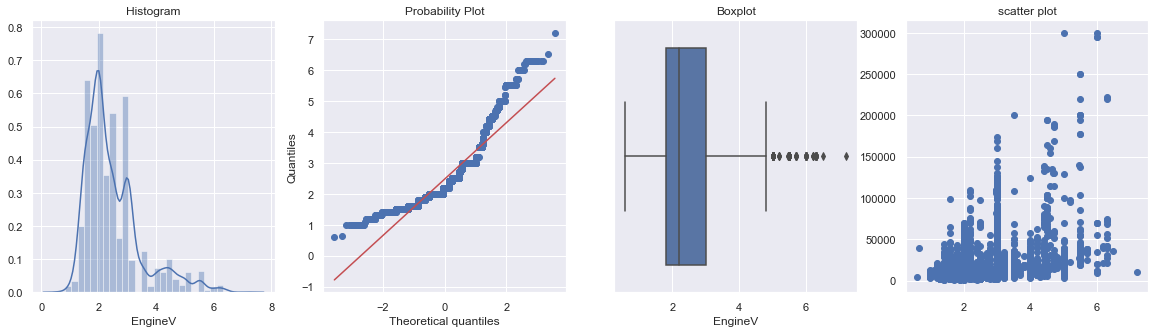

In [329]:
analyse_continuous(df,'EngineV',target)

Price

Skewness: 4.428015
Kurtosis: 28.655122


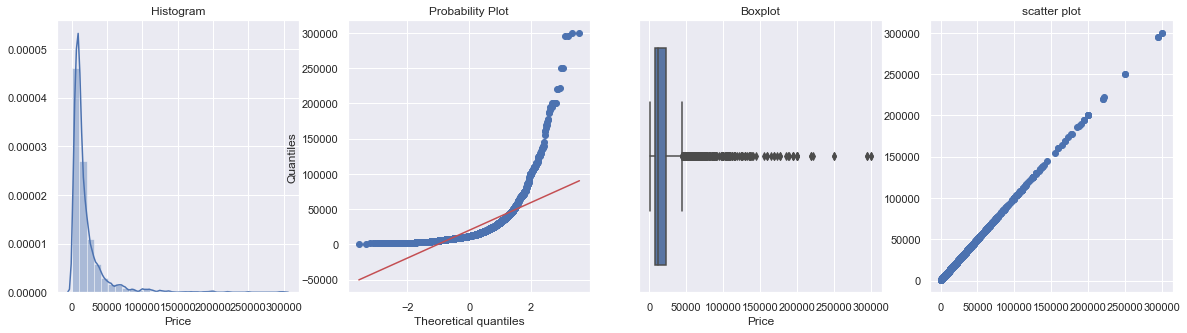

In [330]:
analyse_continuous(df,'Price',target)

In [331]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'Price', 5)
upper_boundary, lower_boundary

(96312.5, -67175.0)

In [332]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['Price'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['Price'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Price'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Price'] < lower_boundary]) / len(df)))

total number of Year: 3952
cars with more than upper_boundary of Mileage (right end outliers): 99
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.025050607287449393
% left end outliers: 0.0


In [333]:
df = df[(df.Price < upper_boundary) & (df.Price > lower_boundary)]
df = df.reset_index(drop = True)
df.shape

(3853, 10)

Skewness: 2.062913
Kurtosis: 4.676606


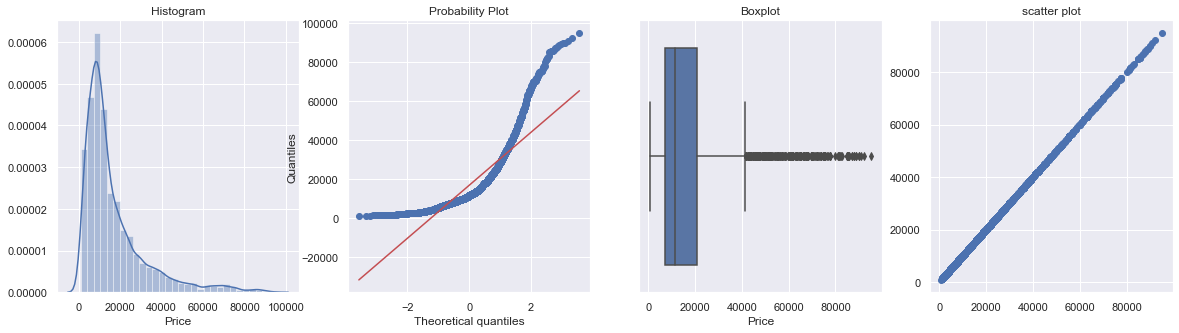

In [334]:
analyse_continuous(df,'Price',target)

In [335]:
df = df.reset_index(drop = True)
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1320.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:50:49   Log-Likelihood:                -32889.
No. Observations:                3082   AIC:                         6.579e+04
Df Residuals:                    3078   BIC:                         6.581e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+06   8.66e+04    -23.440      0.0

#### Exp: 

### 5.1.3. Gaussian Transformation

#### Exp

+ Use only numerical vars
+ Remove outliers
+ transform Price to have linear relationship

In [336]:
# df = cleaned_df.copy()

In [337]:
df.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


Skewness: 0.247052
Kurtosis: 0.193319


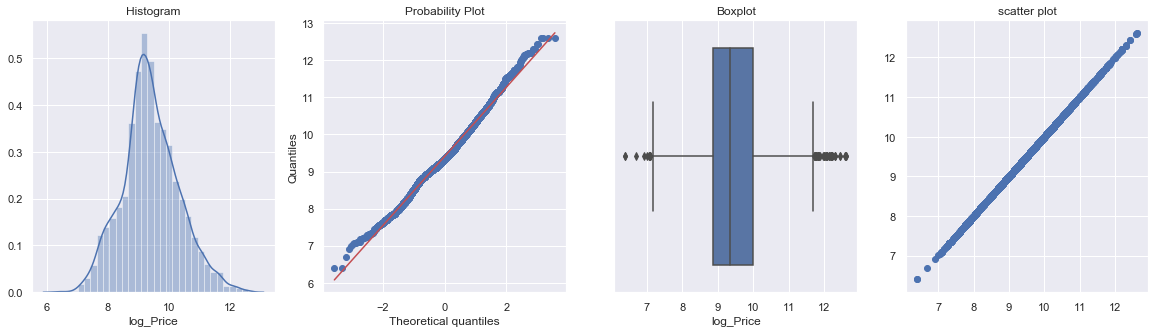

In [338]:
df['log_Price'] = np.log(df['Price'])
target = 'log_Price'
analyse_continuous(df,'log_Price',target)

Skewness: -0.963945
Kurtosis: 0.999387


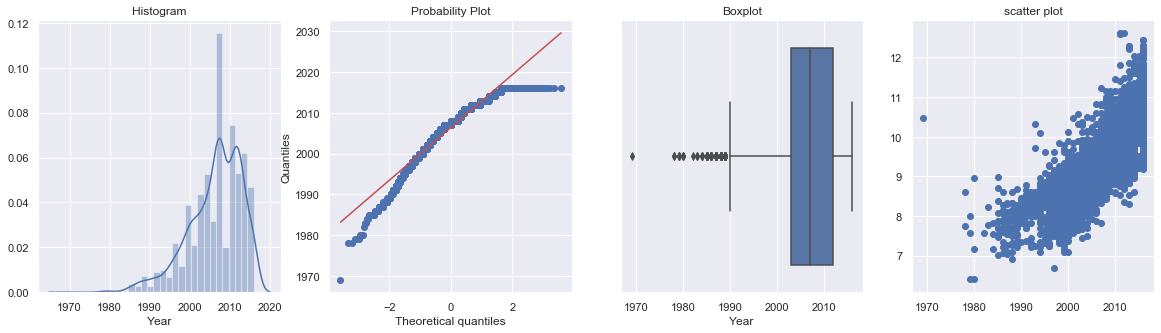

Skewness: 0.700196
Kurtosis: 1.809798


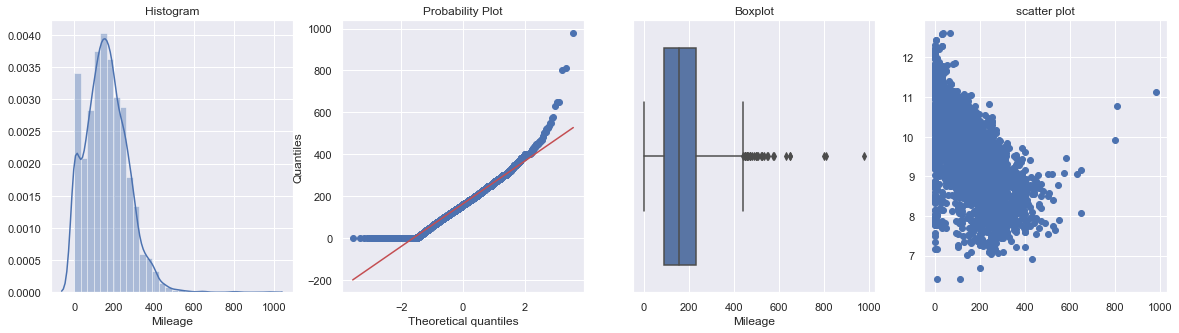

Skewness: 17.154962
Kurtosis: 316.181652


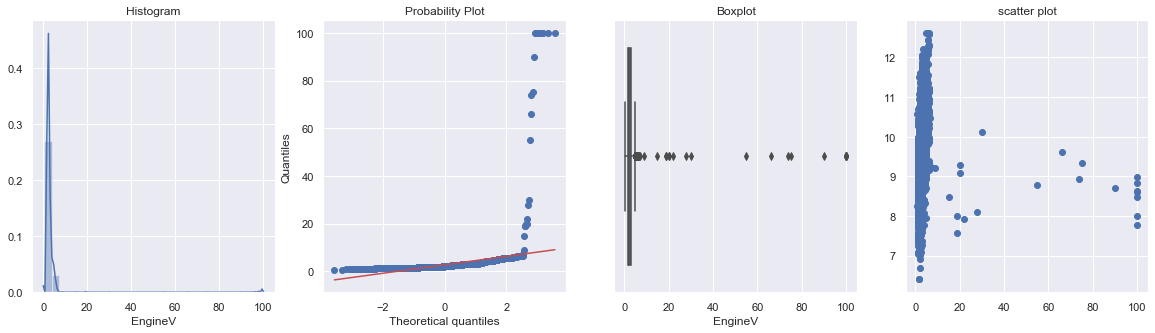

In [339]:
num_vars = ['Year','Mileage','EngineV']
for var in num_vars:
    analyse_continuous(df,var,target)

In [340]:
df = df.reset_index(drop = True)
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     1485.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:50:58   Log-Likelihood:                -2970.4
No. Observations:                3220   AIC:                             5949.
Df Residuals:                    3216   BIC:                             5973.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -172.5613      4.429    -38.965      0.0

## Exp4

+ Use only numerical vars
+ Remove outliers
+ transform Price to have linear relationship
+ transform independent vars to have Normal distribution

In [341]:
# df = cleaned_df.copy()

KeyError: 'log_Price'

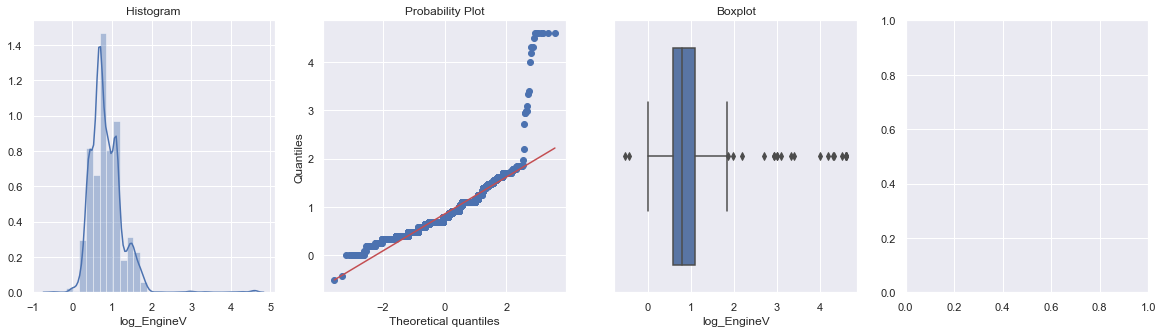

In [342]:
df['log_EngineV'] = np.log(df['EngineV'])
analyse_continuous(df,'log_EngineV',target)

In [ ]:
df[num_vars].corr()

In [ ]:
num_vars  = ['Year','Mileage','log_EngineV']
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

In [ ]:
cat_vars = ['Brand', 'Body', 'EngineType', 'Model']

print('Cat vars: ', cat_vars)
print('Taret: ', target)
print('Num vars: ', num_vars)

## 5.2. Categorical vars

### Engineering mixed vars

https://www.geeksforgeeks.org/python-extract-numbers-from-string/

https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8


In [ ]:
print(len(df.Model.unique()))
df.Model.unique()

#### Exp: create dummy vars for all labels without removing first var

#### Exp: create dummy vars for all labels with removing first var

In [295]:
dummy_df = pd.get_dummies(df.Model, drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(4025, 305)


,100,11,116,118,120,19,190,200,21,210,...,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,Z3,Z4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     32.29
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:48:19   Log-Likelihood:                -35145.
No. Observations:                3220   AIC:                         7.086e+04
Df Residuals:                    2934   BIC:                         7.260e+04
Df Model:                         285                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.759e+06    

Test set score:  0.6631033344388821


In [241]:
df.Model.dtype

dtype('O')

In [276]:
import re 

def LetterPart_Extraction(init_string):
    # letter_part = " ".join(re.findall("[a-zA-Z]+", ini_string)) 
    letter_part = ''.join(filter(lambda chr: chr.isalpha(), init_string))
    return letter_part

def NumberPart_Extraction(init_string):
    # number_part = [int(s) for s in init_string.split() if s.isdigit()]
    number_part = ''.join(filter(lambda i: i.isdigit(), init_string))
    # number_part = list(map(int, re.findall(r'\d+', init_string))) 
    return number_part

df['Model_categorical'] = df.Model.apply(lambda x:LetterPart_Extraction(x))
df['Model_numerical'] = df.Model.apply(lambda x:NumberPart_Extraction(x))
df.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Model_categorical,Model_numerical
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,Sprinter,212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,S,500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,Q,7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,Rav,4


### 5.2.1. High cardinality



In [278]:
print(len(df.Model_categorical.unique()))
df.Model_categorical.unique()

154


array(['', 'Sprinter', 'S', 'Q', 'Rav', 'GLS', 'A', 'Megane', 'GolfIV',
       'AAllroad', 'PassatB', 'LandCruiser', 'Clio', 'Hilux', 'Polo',
       'Outlander', 'Touareg', 'Vito', 'Colt', 'Z', 'PajeroWagon', 'X',
       'Caddy', 'Camry', 'TT', 'GAMG', 'Galant', 'Kangoo', 'ML', 'Trafic',
       'XM', 'Lancer', 'EClass', 'Scenic', 'LandCruiserPrado',
       'Caravelle', 'Avensis', 'GL', 'LancerX', 'Tiguan', 'OutlanderXL',
       'GolfIII', 'FJCruiser', 'Koleos', 'Scirocco', 'M', 'Venza', 'V',
       'CClass', 'Lupo', 'Series', 'CLA', 'TTransporter', 'Highlander',
       'Corolla', 'CLK', 'I', 'Multivan', 'Vaneo', 'PassatCC', 'GolfII',
       'L', 'Jetta', 'Logan', 'PajeroSport', 'LancerXSportback',
       'GolfPlus', 'Up', 'Amarok', 'G', 'Auris', 'CL', 'Master', 'Dokker',
       'GolfVI', 'GolfVII', 'Laguna', 'NewBeetle', 'Pajero', 'Viano',
       'Sharan', 'Prius', 'B', 'Fluence', 'Duster', 'Hiace', 'CLC',
       'GolfV', 'Fortuner', 'LT', 'Symbol', 'Yaris', 'Espace',
       'GolfVaria

In [279]:
df.Brand.unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [282]:
df[df.Brand == 'BMW'].Model_categorical.unique()

array(['', 'Z', 'X', 'XM', 'M', 'Series', 'I', 'SeriesGT',
       'SeriesGranCoupe'], dtype=object)

In [283]:
df[df.Brand == 'Mercedes-Benz'].Model_categorical.unique()

array(['Sprinter', 'S', 'GLS', 'Vito', 'GAMG', 'ML', 'EClass', 'GL', '',
       'A', 'V', 'CClass', 'CLA', 'CLK', 'Vaneo', 'G', 'CL', 'Viano', 'B',
       'CLC', 'CLAMG', 'GLEClass', 'SAMG', 'SLK', 'MLAMG', 'GLK', 'CLS',
       'R', 'Smart', 'SL', 'MB', 'CLSAMG', 'CLAClass', 'SGuard',
       'GLCClass', 'SLAMG'], dtype=object)

In [291]:
df[df.Brand == 'Audi'].Model_categorical.unique()

array(['Q', 'A', 'AAllroad', '', 'TT', 'R', 'S'], dtype=object)

In [290]:
df[df.Brand == 'Toyota'].Model_categorical.unique()

array(['Rav', 'LandCruiser', 'Hilux', 'Camry', 'LandCruiserPrado',
       'Avensis', 'FJCruiser', 'Venza', 'Highlander', 'Corolla', 'Auris',
       'Prius', 'Hiace', 'Fortuner', 'Yaris', 'Tacoma', 'IQ', 'Celica',
       'Tundra', 'Sienna', 'Previa', 'Carina', 'Vista', 'Avalon', 'Aygo',
       'Matrix', 'MarkII', 'CorollaVerso', 'LiteAce', 'Runner', 'Sequoia',
       'Scion'], dtype=object)

In [288]:
df[df.Brand == 'Renault'].Model_categorical.unique()

array(['Megane', '', 'Clio', 'Kangoo', 'Trafic', 'Scenic', 'Koleos',
       'Logan', 'Master', 'Dokker', 'Laguna', 'Fluence', 'Duster',
       'Symbol', 'Espace', 'GrandScenic', 'Sandero', 'Latitude', 'Modus',
       'Captur', 'SanderoStepWay'], dtype=object)

In [289]:
df[df.Brand == 'Volkswagen'].Model_categorical.unique()

array(['GolfIV', 'PassatB', 'Polo', 'Touareg', 'Caddy', 'Caravelle',
       'Tiguan', 'GolfIII', 'Scirocco', 'Lupo', 'TTransporter',
       'Multivan', 'PassatCC', 'GolfII', 'Jetta', 'GolfPlus', 'Up',
       'Amarok', 'GolfVI', 'GolfVII', 'NewBeetle', 'Sharan', 'GolfV',
       'LT', 'GolfVariant', 'Touran', 'Phaeton', 'Bora', 'Vento',
       'Beetle', 'CrossTouran', 'Pointer', 'Eos', 'GolfGTI', 'Syncro'],
      dtype=object)

In [285]:
df[df.Brand == 'Mitsubishi'].Model_categorical.unique()

array(['Outlander', 'Colt', 'PajeroWagon', 'Galant', 'Lancer', 'LancerX',
       'OutlanderXL', 'L', 'PajeroSport', 'LancerXSportback', 'Pajero',
       'PajeroPinin', 'Grandis', 'ASX', 'SpaceStar', 'Carisma', 'Eclipse',
       'Virage', 'SpaceWagon', 'LancerEvolution'], dtype=object)

### 5.2.2. Rare values

### 5.2.3. Encode categorical vars

#### Brand

In [301]:
dummy_df = pd.get_dummies(df.Brand, drop_first=True)
# cat_df = dummy_df.copy()
cat_df = pd.DataFrame()
print(cat_df.shape)
cat_df.head()

(0, 0)


""


In [299]:
num_df.head()

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011


In [302]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     409.0
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          4.92e-225
Time:                        06:49:45   Log-Likelihood:                -36910.
No. Observations:                3220   AIC:                         7.383e+04
Df Residuals:                    3216   BIC:                         7.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.395e+06   1.67e+05    -14.302      0.0

#### Body

#### Engine Type

#### Model